# Week 10 - AI Lab

Author: Khushee Kapoor

Registration Number: 200968052

To start, we import the libraries:
- gym: to simulate the Taxi Environment
- numpy: for data manipulation
- matplotlib: for data visualization

In [18]:
# importing the libraries
import gym
import numpy as np
import matplotlib.pyplot as plt

Next, we import the Taxi Environment. 

The Taxi-v3 environment is a classic reinforcement learning problem, designed as part of the OpenAI Gym library, which simulates a simple gridworld with a taxi navigating passengers to their respective destinations.

In the environment, the taxi is placed in a 5x5 grid world with four possible pickup/dropoff locations, represented by different colored squares. The taxi can move in any of the four cardinal directions, but some squares in the grid are blocked, making it impossible to move through them. The goal of the agent is to pick up a passenger from their current location and take them to their destination, while avoiding the blocked squares.

The agent receives a reward of -1 for each time step that passes, with the objective being to complete the task in as few steps as possible. Once the passenger has been successfully dropped off, the environment is reset, and a new passenger is placed at a random location, with a new destination.

The state space of the environment consists of the current location of the taxi, the current location of the passenger, and the destination of the passenger. The action space consists of six possible actions: moving north, south, east, or west, picking up the passenger, or dropping off the passenger.

In [19]:
# Define the Taxi-v2 environment
env = gym.make('Taxi-v3')

Next, we define the parameters to be used throughout.

In [20]:
# set the learning parameters
alpha = 0.4
gamma = 0.9
epsilon = 0.9
num_episodes = 2000

We intialize the Q-Table will be used in all the policies while implementing the Epsilon greedy approach.

In [21]:
# initialize the Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

Next, we define an epsilon-greedy policy for a reinforcement learning agent. The policy selects an action for the agent to take based on a combination of the agent's current state and a probability parameter, epsilon.

The function takes two arguments:

- state: The current state of the agent in the environment.
- epsilon: The probability that the agent will select a random action instead of following the greedy policy.
The function uses a random number generator to generate a uniform random number between 0 and 1. If the random number is less than epsilon, the function selects a random action from the action space of the environment using the env.action_space.sample() method. Otherwise, the function selects the action with the highest estimated value (i.e., the greedy action) based on the current state of the agent and the Q-values stored in the Q-table using the np.argmax(Q[state, :]) method.

The function returns the selected action for the agent to take.

In [22]:
# define the epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

Then, we define a function that implements the SARSA (State-Action-Reward-State-Action) algorithm for reinforcement learning. SARSA is an on-policy TD learning algorithm that updates Q-values based on the agent's experience while following the policy being learned.

The function uses the epsilon-greedy policy defined in a separate function (not shown here) to select actions for the agent to take during each episode of the algorithm. The function takes no arguments, but it assumes the following variables have been defined:

- num_episodes: The number of episodes to run the algorithm for.
- alpha: The learning rate or step size for the Q-value updates.
- gamma: The discount factor for future rewards.
- epsilon: The probability that the agent will select a random action instead of following the greedy policy.
The function returns a list of total rewards earned by the agent during each episode of the algorithm.

During each episode, the function initializes the environment and selects the first action based on the epsilon-greedy policy. It then takes steps in the environment, updating Q-values using the SARSA update rule at each step. The total reward earned during the episode is accumulated, and the loop continues until the episode is complete (i.e., the agent reaches a terminal state). The total reward for the episode is then appended to a list of rewards, and the loop continues for the specified number of episodes.

In [23]:
# implement SARSA algorithm
def sarsa():
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy_policy(state, epsilon)
        total_reward = 0
        while True:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy_policy(next_state, epsilon)
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            total_reward += reward
            state = next_state
            action = next_action
            if done:
                rewards.append(total_reward)
                break
    return rewards

We re-intialize the Q-Table will be used in all the policies while implementing the Epsilon greedy approach.

In [24]:
# re-initialize the Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

Next, we define a function that implements the Q-learning algorithm for reinforcement learning. Q-learning is an off-policy TD learning algorithm that learns an optimal policy by updating Q-values based on the maximum Q-value of the next state.

The function uses the epsilon-greedy policy defined in a separate function (not shown here) to select actions for the agent to take during each episode of the algorithm. The function takes no arguments, but it assumes the following variables have been defined:

- num_episodes: The number of episodes to run the algorithm for.
- alpha: The learning rate or step size for the Q-value updates.
- gamma: The discount factor for future rewards.
- epsilon: The probability that the agent will select a random action instead of following the greedy policy.
The function returns a list of total rewards earned by the agent during each episode of the algorithm.

During each episode, the function initializes the environment and takes steps in the environment, updating Q-values using the Q-learning update rule at each step. The total reward earned during the episode is accumulated, and the loop continues until the episode is complete (i.e., the agent reaches a terminal state). The total reward for the episode is then appended to a list of rewards, and the loop continues for the specified number of episodes. The Q-values are updated using the maximum Q-value of the next state, regardless of the action selected by the agent.

In [25]:
# implement Q-learning algorithm
def q_learning():
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        while True:
            action = epsilon_greedy_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
            total_reward += reward
            state = next_state
            if done:
                rewards.append(total_reward)
                break
    return rewards

We re-intialize the Q-Table will be used in all the policies while implementing the Epsilon greedy approach.

In [26]:
# re-initialize the Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

Next, we define a function that implements the Expected SARSA (State-Action-Reward-State-Action) algorithm for reinforcement learning. Expected SARSA is an on-policy TD learning algorithm that updates Q-values based on the expected value of the next state-action pair under the current policy.

The function uses the epsilon-greedy policy defined in a separate function (not shown here) to select actions for the agent to take during each episode of the algorithm. The function takes no arguments, but it assumes the following variables have been defined:

- num_episodes: The number of episodes to run the algorithm for.
- alpha: The learning rate or step size for the Q-value updates.
- gamma: The discount factor for future rewards.
- epsilon: The probability that the agent will select a random action instead of following the greedy policy.
The function returns a list of total rewards earned by the agent during each episode of the algorithm.

During each episode, the function initializes the environment and takes steps in the environment, updating Q-values using the Expected SARSA update rule at each step. The total reward earned during the episode is accumulated, and the loop continues until the episode is complete (i.e., the agent reaches a terminal state). The total reward for the episode is then appended to a list of rewards, and the loop continues for the specified number of episodes. The Expected SARSA update rule calculates the expected value of the next state-action pair under the current policy, taking into account the epsilon-greedy exploration strategy.

In [27]:
# implement Expected SARSA algorithm
def expected_sarsa():
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        while True:
            action = epsilon_greedy_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            expected_value = np.dot(Q[next_state, :], np.ones(env.action_space.n) * epsilon / env.action_space.n) + \
                             np.max(Q[next_state, :]) * (1 - epsilon)
            Q[state, action] += alpha * (reward + gamma * expected_value - Q[state, action])
            total_reward += reward
            state = next_state
            if done:
                rewards.append(total_reward)
                break
    return rewards

After defining all the functions, we implement them and store the rewards returned.

In [28]:
# implementing the methods
r_sarsa = sarsa()
r_qlearn = q_learning()
r_esarsa = expected_sarsa()

We first plot the rewards generated by sarsa using functions from the matplotlib library.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Rewards')

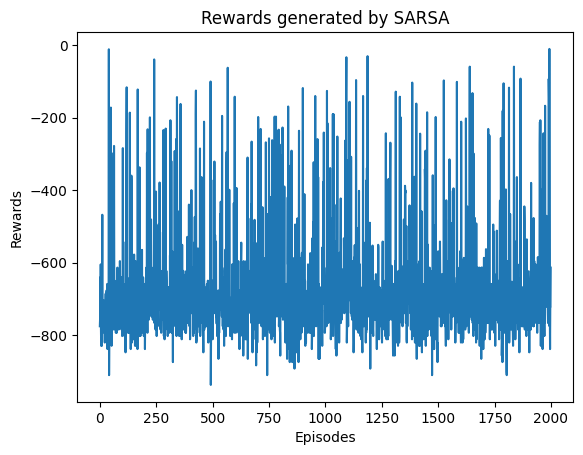

In [30]:
# plotting rewards generated by SARSA
plt.plot(r_sarsa)
plt.title('Rewards generated by SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

As we can see, the concentration of rewards is more towards the negative side, but it is very noisy. To get a better heuristic, we average the rewards.

In [32]:
# average rewards generated by sarsa
np.mean(r_sarsa)

-671.9325

Then we plot the rewards generated by qlearning using functions from the matplotlib library.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Rewards')

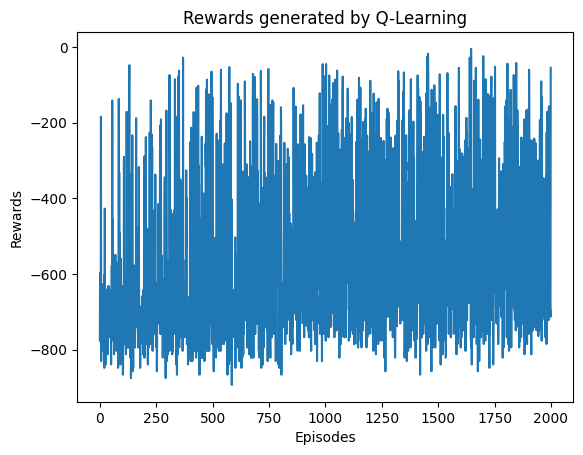

In [31]:
# plotting rewards generated by Q-Learning
plt.plot(r_qlearn)
plt.title('Rewards generated by Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

As we can see, the concentration of rewards is very noisy, and is spread all over the negative axis. To get a better heuristic, we average the rewards.

In [33]:
# average rewards generated by qlearning
np.mean(r_qlearn)

-571.525

Then we plot the rewards generated by esarsa using functions from the matplotlib library.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Rewards')

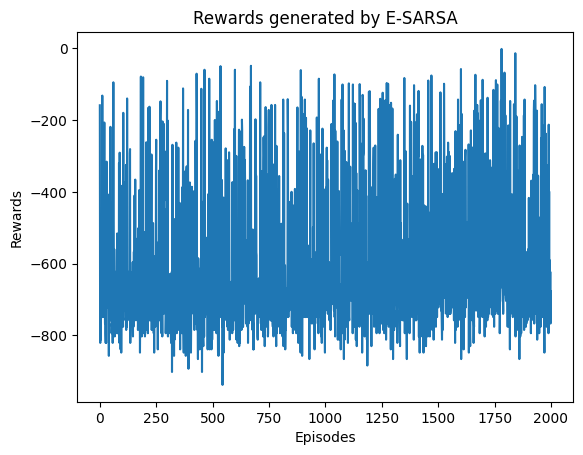

In [34]:
# plotting rewards generated by E-SARSA
plt.plot(r_esarsa)
plt.title('Rewards generated by E-SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

As we can see, the concentration of rewards is very noisy, and is spread all over the negative axis. To get a better heuristic, we average the rewards.

In [35]:
# average rewards generated by esarsa
np.mean(r_esarsa)

-603.486

The rewards generated by all the three methods are negative, because the reward strucutre is such that the reward generated for every step is -1, and we must minimize this.

To conclude, of all the three methods, the least negative average reward is generated by Q-Learning, from which we can infer that it performs the best among all the three methods used. 